In [ ]:
import pickle

with open("./melon.pkl", 'rb') as f:     # rb(read binary): 이진 데이터로 파일을 읽음   
    total = pickle.load(f)               # pickle: 파이썬 개게 직렬화 모듈, 객체를 저장하거나 복원

In [2]:
total

[{'title': 'Good Goodbye',
  'artist': '화사 (HWASA)',
  'lyrics': "나를 그냥 짓밟고 가\n괜찮아 돌아보지 마\n내가 아파봤자 너만 하겠니\n이젠 너를 헤아려봐\n\n날 위해 쉬던 그 숨은 잊고\n저 위에 널 위해 just kill my ego\n\n등 돌려 걸어가\nYou got it you got it yeah\n\n안녕은 우릴 아프게 하지만 우아할 거야\n나 땅을 치고 후회하도록 넌 크게 웃어줘 \ngoodb-ye\n\nbye ye ye ye ye ye\nbye ye ye ye ye ye (b-ye)\nbye ye ye ye ye ye\nbye ye ye ye ye \n후회하도록 goodb-ye\n\n널 생각한 운율이야\n비로소 느껴지잖아\n눈물은 고이고 찬란하게 빛나\n우린 좋은 안녕 중이야\n\n고맙단 말 대신 전할게\ngoodbye good goodbye\n \n안녕은 우릴 아프게 하지만 우아할 거야\n나 땅을 치고 후회하도록 넌 크게 웃어줘 \ngoodb-ye\n\nbye ye ye ye ye ye\nbye ye ye ye ye ye (b-ye)\nbye ye ye ye ye ye\nbye ye ye ye ye \n\n세상이 나를 빤히 내려다봐도\n내 편이 돼 줄 사람 하나 없어도\nDon't worry it's okay \n난 내 곁에 있을게\nI'll be on my side instead of you\n\n안녕은 나를 아프게 하지만 울어볼 거야\n땅을 치고 후회해도 좋아 우리 이렇게 \ngoodb-ye\n\nbye ye ye ye ye ye\nbye ye ye ye ye ye (b-ye)\nbye ye ye ye ye ye\nbye ye ye ye ye \n후회조차도 goodb-ye"},
 {'title': 'Blue Valentine',
  'artist': 'NMIXX',
  'lyrics': 'You’ll always be my blue valentine\nYou’ll always be 

In [4]:
import pandas as pd

df = pd.DataFrame(total)

In [6]:
df

,title,artist,lyrics
0,Good Goodbye,화사 (HWASA),나를 그냥 짓밟고 가\n괜찮아 돌아보지 마\n내가 아파봤자 너만 하겠니\n이젠 너를...
1,Blue Valentine,NMIXX,You’ll always be my blue valentine\nYou’ll alw...
2,타임캡슐,다비치,점점 지쳐만 가는 \n많이 무료한 날들 \n하루 끝의 나를 돌아보기도 싫어 \n나도...
3,ONE MORE TIME,ALLDAY PROJECT,느껴봐\nSomething in the air tonight\n빛이 나\n다신 오지...
4,Golden,HUNTR/X,"I was a ghost, I was alone, hah\n어두워진, hah, 앞길..."
...,...,...,...
95,숲,최유리,난 저기 숲이 돼볼게 \n너는 자그맣기만 한 언덕 위를 \n오르며 날 바라볼래 \n...
96,HOT,LE SSERAFIM (르세라핌),위태로운 드라이브 \n바꿔 넣어 gear \n불타는 노을\n너와 내 tears so...
97,OVERDRIVE,TWS (투어스),잠깐 날 볼 때마다 놀라\n너무 뜨거워서 겁나\n이건 위험해\nI’m getting...
98,Sticky Like,RIIZE,너와 있을 땐 다른 내가 돼\n그게 싫지 않아 솔직하게\n마음속에 너라는 존재가 커...


---

In [8]:
import pymysql

In [31]:
conn = pymysql.connect(host='127.0.0.1', user= 'kdt', passwd='123', port=3306)

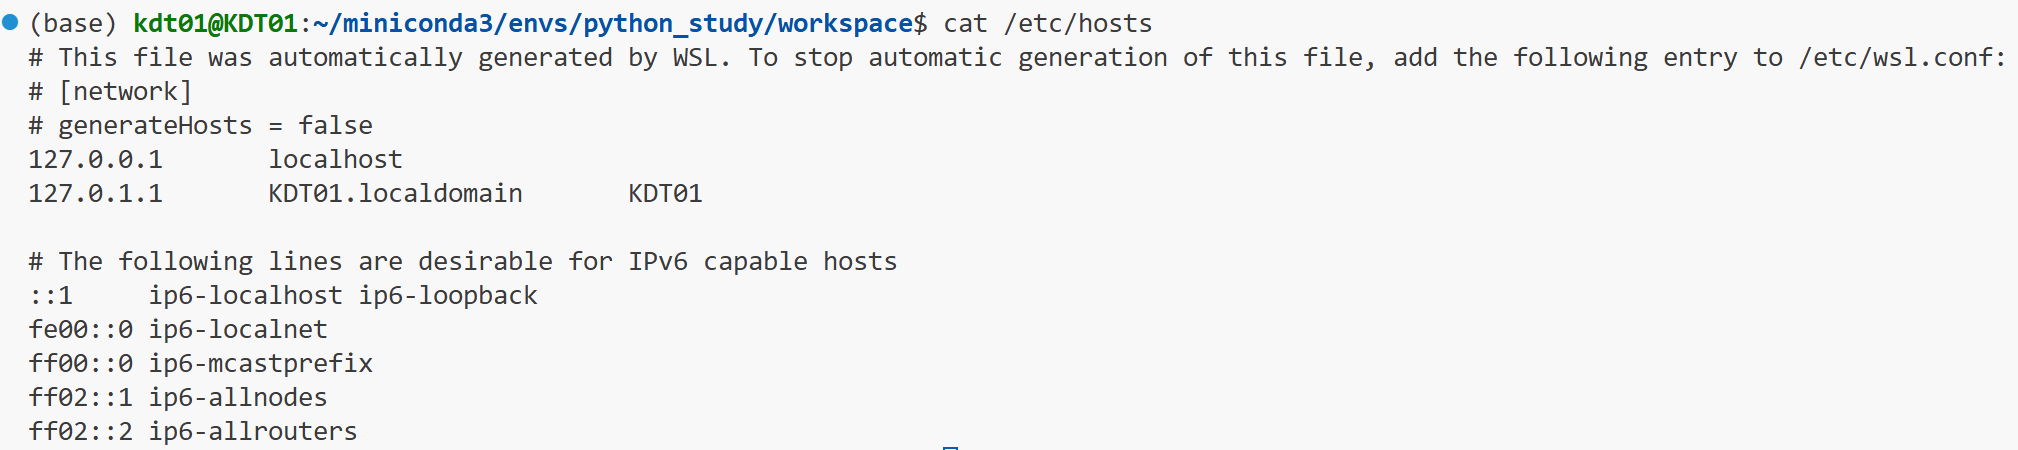

In [32]:
cur = conn.cursor()

In [11]:
cur.execute("create database kdt")

1

In [40]:
conn = pymysql.connect(host='127.0.0.1', user= 'kdt', password='123', port=3306, database="kdt")
cursor = conn.cursor()

In [47]:
sql = """ 
CREATE TABLE kdt.melon_lyrics(
title varchar(200) not null ,
artist varchar(200) not null,
lyrics text
)
 """

In [48]:
cursor.execute(sql)

0

In [49]:
cursor.execute('show tables')
cursor.fetchall()

(('melon_lyrics',),)

---

In [23]:
try:
    cursor.execute(sql)
except:
    print("Hi")
print("hello")

Hi
hello


In [ ]:
try:
    cursor.execute(sql)
except Exception as e:
    print(e)
print("hello")

(1050, "Table 'melon_lyrics' already exists")
hello


---

In [50]:
sql = "insert into kdt.melon_lyrics values(%s, %s, %s)"

In [51]:
for key, val in total[0].items():
    print(val)

Good Goodbye
화사 (HWASA)
나를 그냥 짓밟고 가
괜찮아 돌아보지 마
내가 아파봤자 너만 하겠니
이젠 너를 헤아려봐

날 위해 쉬던 그 숨은 잊고
저 위에 널 위해 just kill my ego

등 돌려 걸어가
You got it you got it yeah

안녕은 우릴 아프게 하지만 우아할 거야
나 땅을 치고 후회하도록 넌 크게 웃어줘 
goodb-ye

bye ye ye ye ye ye
bye ye ye ye ye ye (b-ye)
bye ye ye ye ye ye
bye ye ye ye ye 
후회하도록 goodb-ye

널 생각한 운율이야
비로소 느껴지잖아
눈물은 고이고 찬란하게 빛나
우린 좋은 안녕 중이야

고맙단 말 대신 전할게
goodbye good goodbye
 
안녕은 우릴 아프게 하지만 우아할 거야
나 땅을 치고 후회하도록 넌 크게 웃어줘 
goodb-ye

bye ye ye ye ye ye
bye ye ye ye ye ye (b-ye)
bye ye ye ye ye ye
bye ye ye ye ye 

세상이 나를 빤히 내려다봐도
내 편이 돼 줄 사람 하나 없어도
Don't worry it's okay 
난 내 곁에 있을게
I'll be on my side instead of you

안녕은 나를 아프게 하지만 울어볼 거야
땅을 치고 후회해도 좋아 우리 이렇게 
goodb-ye

bye ye ye ye ye ye
bye ye ye ye ye ye (b-ye)
bye ye ye ye ye ye
bye ye ye ye ye 
후회조차도 goodb-ye


In [52]:
[val for key, val in total[0].items()]

['Good Goodbye',
 '화사 (HWASA)',
 "나를 그냥 짓밟고 가\n괜찮아 돌아보지 마\n내가 아파봤자 너만 하겠니\n이젠 너를 헤아려봐\n\n날 위해 쉬던 그 숨은 잊고\n저 위에 널 위해 just kill my ego\n\n등 돌려 걸어가\nYou got it you got it yeah\n\n안녕은 우릴 아프게 하지만 우아할 거야\n나 땅을 치고 후회하도록 넌 크게 웃어줘 \ngoodb-ye\n\nbye ye ye ye ye ye\nbye ye ye ye ye ye (b-ye)\nbye ye ye ye ye ye\nbye ye ye ye ye \n후회하도록 goodb-ye\n\n널 생각한 운율이야\n비로소 느껴지잖아\n눈물은 고이고 찬란하게 빛나\n우린 좋은 안녕 중이야\n\n고맙단 말 대신 전할게\ngoodbye good goodbye\n \n안녕은 우릴 아프게 하지만 우아할 거야\n나 땅을 치고 후회하도록 넌 크게 웃어줘 \ngoodb-ye\n\nbye ye ye ye ye ye\nbye ye ye ye ye ye (b-ye)\nbye ye ye ye ye ye\nbye ye ye ye ye \n\n세상이 나를 빤히 내려다봐도\n내 편이 돼 줄 사람 하나 없어도\nDon't worry it's okay \n난 내 곁에 있을게\nI'll be on my side instead of you\n\n안녕은 나를 아프게 하지만 울어볼 거야\n땅을 치고 후회해도 좋아 우리 이렇게 \ngoodb-ye\n\nbye ye ye ye ye ye\nbye ye ye ye ye ye (b-ye)\nbye ye ye ye ye ye\nbye ye ye ye ye \n후회조차도 goodb-ye"]

In [53]:
cursor.execute(sql,[val for key, val in total[0].items()])

1

In [54]:
conn.commit()

In [55]:
for item in total[1:]:
    cursor.execute(sql,[val for key, val in item.items()])

In [56]:
conn.commit()